In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [451]:
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

#libraries
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt

#settings
sns.set(style="white")
plt.rc('figure', figsize=[12, 5])
np.set_printoptions(precision=3)


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
# test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(f'DataFrame    shape')
print(f'train_df   {train_df.shape}')
print(f'test_df    {test_df.shape}')

DataFrame    shape
train_df   (891, 12)
test_df    (418, 11)


In [8]:
# print(f'train_CABIN has {train_df.cabin.isna().sum()} null values and test_CABIN has {test_df.cabin.isna().sum()} null values')
# print(f'train_Age has {train_df.age.isna().sum()} null values and test_Age has {test_df.age.isna().sum()} null values')
# print(f'train_Embarked has {train_df.embarked.isna().sum()} null values and test_Embarked has {test_df.embarked.isna().sum()} null values')
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

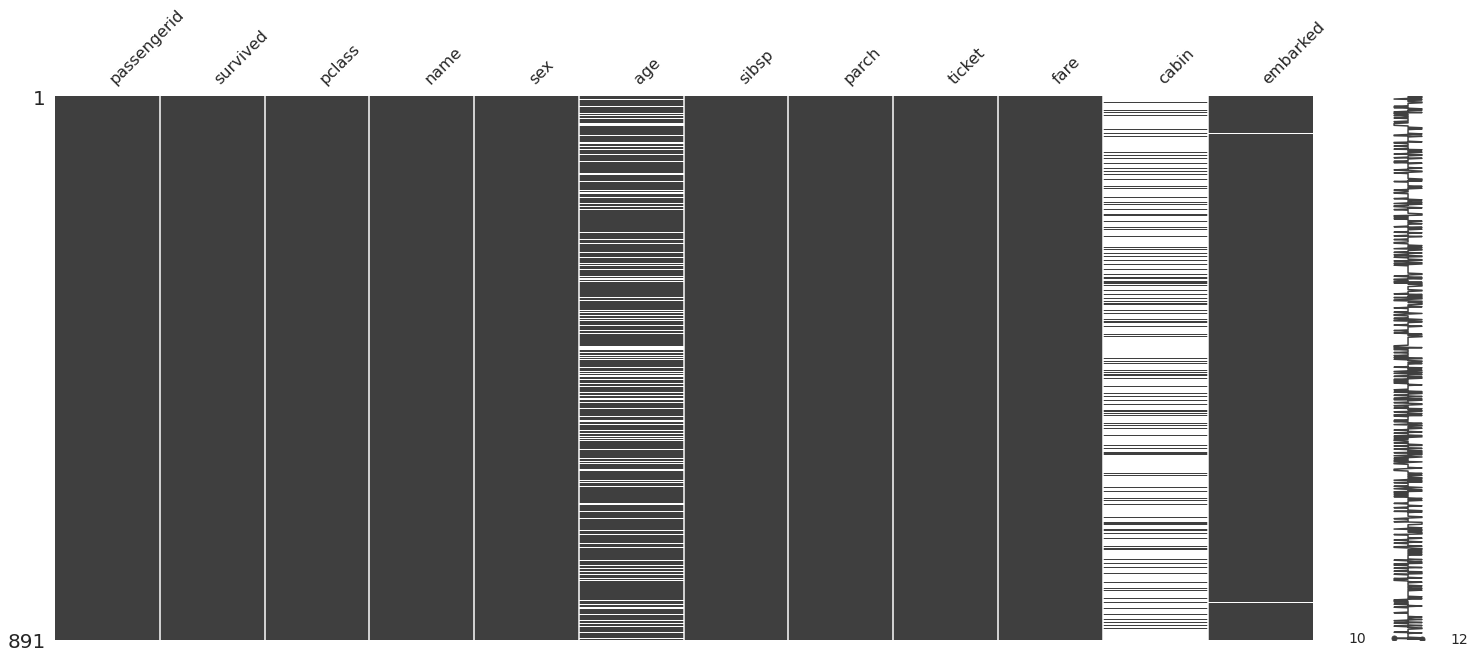

In [10]:
msno.matrix(train_df)

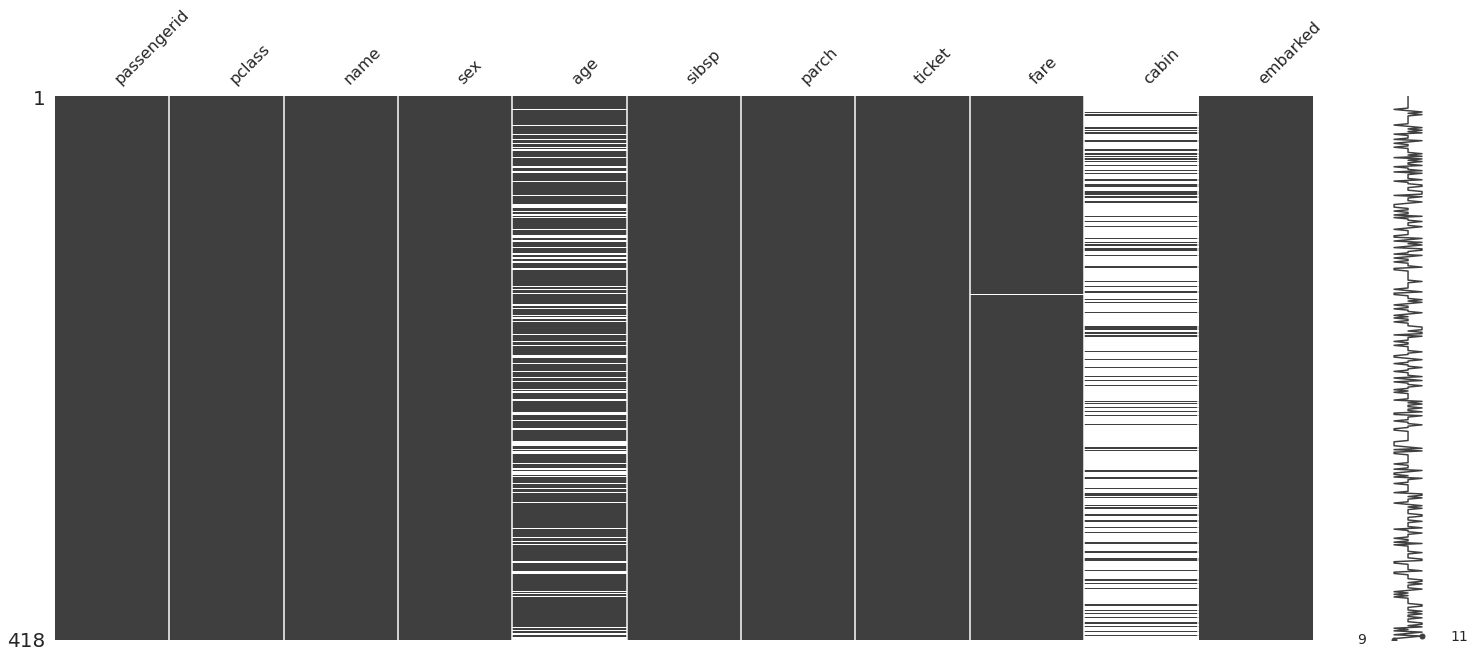

In [11]:
msno.matrix(test_df)

### data cleaning:
* title


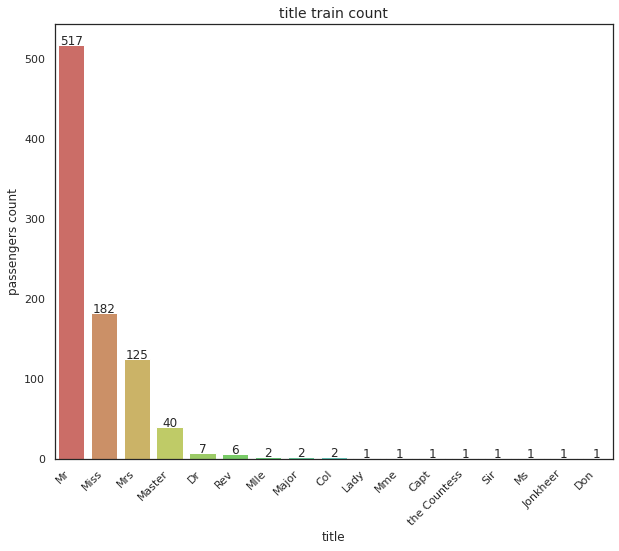

In [55]:
#create a new column named as 'title'
train_df['title']=train_df['name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0].str.strip(' ')

#visualize counts of each title
plt.figure(figsize=(10,8))
ax=sns.countplot(x='title',data=train_df,palette='hls',order=train_df['title'].value_counts().index)
##customize plot
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
plt.title('title train count',fontsize=14)
plt.ylabel('passengers count')
###annotate plot
labels = (train_df['title'].value_counts())
for i,v in enumerate(labels):
    ax.text(i,v,str(v),horizontalalignment='center')
    
plt.show()

In [309]:
train_age_impute = train_df[train_df.title == 'Master'].sort_values(by='survived')
train_age_impute
# sns.catplot(x='survived',y='fare',kind='swarm',data=age_impute)
# sns.catplot(x='survived',y='age',kind='swarm',data=age_impute)
# train_age_impute.groupby(['pclass','survived']).count()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,Master
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,Master
787,788,0,3,"Rice, Master. George Hugh",male,8.00,4,1,382652,29.1250,NaN,Q,Master
278,279,0,3,"Rice, Master. Eric",male,7.00,4,1,382652,29.1250,NaN,Q,Master
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.00,4,2,347077,31.3875,NaN,S,Master
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.00,5,2,CA 2144,46.9000,NaN,S,Master
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q,Master
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master


In [312]:
train_df[train_df.title == 'Mrs'].sort_values(by='survived')
# train_age_impute.groupby(['pclass','survived']).count()


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,Mrs
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,Mrs
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Mrs
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,Mrs
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,Mrs
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,Mrs


In [332]:
#AGE imputed with title's mean
age_dict = {}
for i in list(labels.index):
    age_dict[i] = data.age[data['title']==i].median()

print(age_dict)

{'Mr': 29.0, 'Miss': 22.0, 'Mrs': 35.5, 'Master': 4.0, 'Col': 54.5, 'Rev': 41.5, 'Dr': 49.0, 'Ms': 28.0, 'Dona': 39.0}


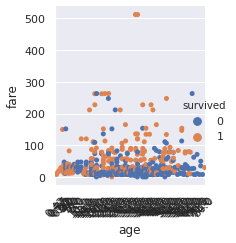

In [283]:
# train_age_impute.groupby('survived').size()
# train_age_impute[train_age_impute.survived==1]
g=sns.catplot(x='age',y='fare',hue='survived',data=train_df)
g.fig.set_figwidth(3)
g.fig.set_figheight(3)
g.set_xticklabels(rotation=45)

In [286]:
train_df[train_df['pclass']==2].sort_values(by='survived') #age<5
# sns.catplot(x='pclass',y='fare',hue='survived',kind='swarm',data=train_df)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S,Rev
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0,NaN,S,Mr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5,NaN,S,Dr
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0,NaN,S,Mr
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0,NaN,C,Miss
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,NaN,S,Miss
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0,NaN,S,Miss
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0,F2,S,Master


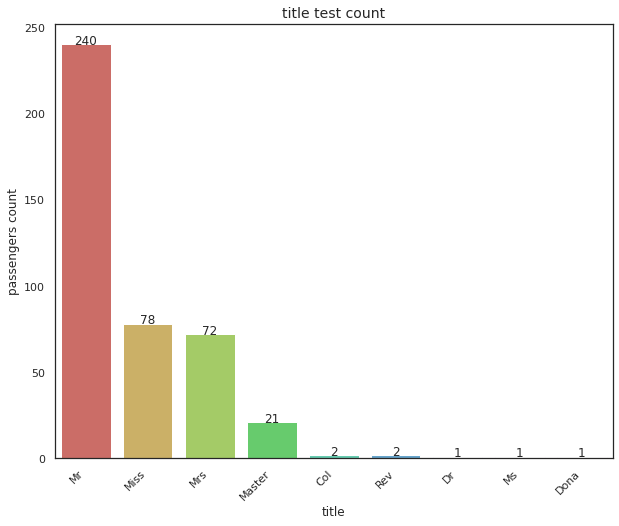

In [56]:
test_df['title']=test_df['name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0].str.strip(' ')
#visualize counts of each title
plt.figure(figsize=(10,8))
ax=sns.countplot(x='title',data=test_df,palette='hls',order=test_df['title'].value_counts().index)
##customize plot
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
plt.title('title test count',fontsize=14)
plt.ylabel('passengers count')
###annotate plot
labels = (test_df['title'].value_counts())
for i,v in enumerate(labels):
    ax.text(i,v,str(v),horizontalalignment='center')
    
plt.show()

**EDA- unimodal**

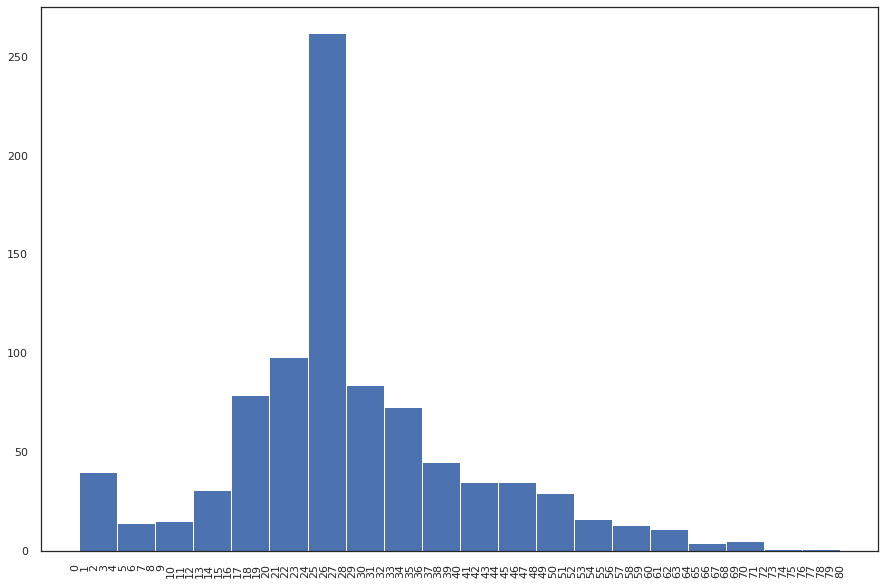

In [83]:
plt.subplots(figsize=(15,10))
plt.hist(train_df_1.age,bins=20)
plt.xticks(range(81),rotation='vertical')
plt.show()

In [350]:
data = pd.concat((train_df,test_df))
data.shape

(1309, 13)

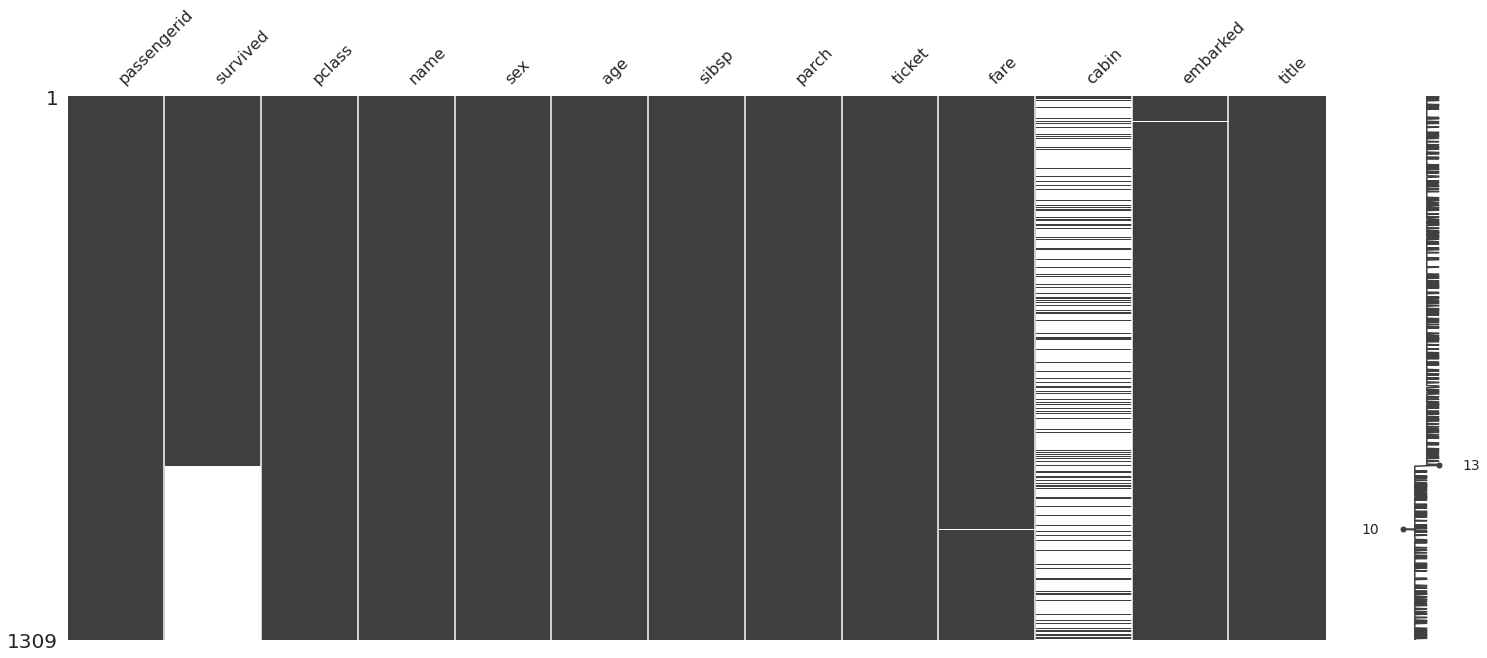

In [349]:
msno.matrix(data)

In [ ]:
#float data visualization
# train_df['age'].value_counts().plot.pie(autopct='%1.1f%%')
sns.catplot(x='survived',y='age',hue='sex',kind='swarm',data=data)
sns.catplot(x='survived',y='age',hue='embarked',kind='swarm',data=train_df)
sns.catplot(x='survived',y='age',hue='pclass',kind='swarm',data=train_df)
# sns.catplot(x='survived',y='age',hue='parch',kind='swarm',data=train_df)
# sns.catplot(x='survived',y='age',hue='sibsp',kind='swarm',data=train_df)

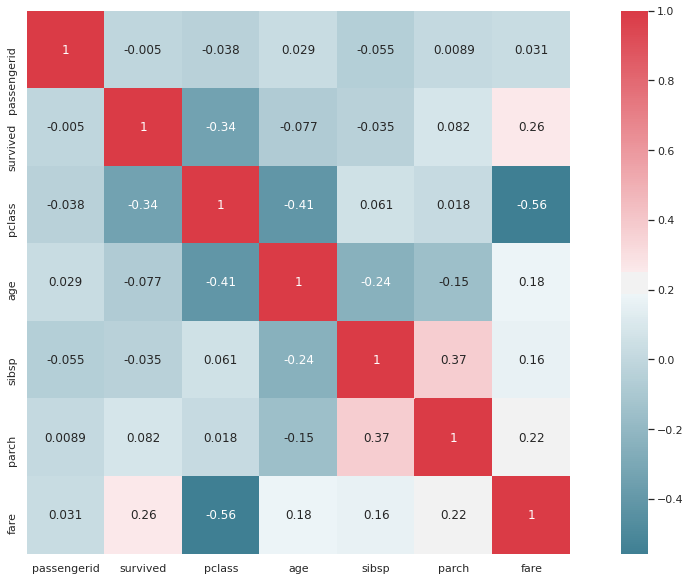

In [351]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(),cmap=cmap,annot=True,square=True)

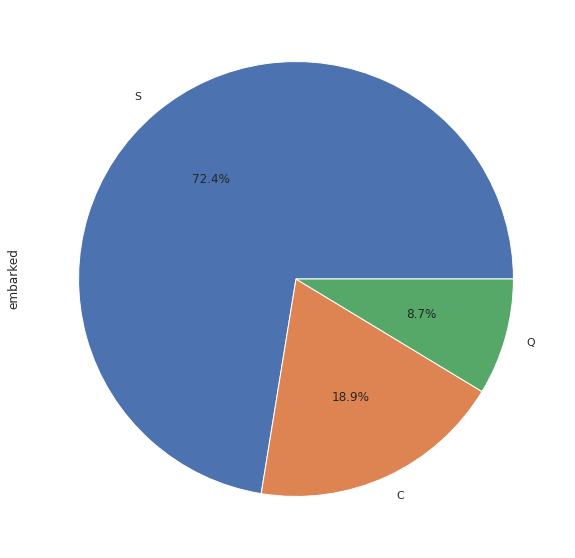

In [352]:
# train_df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
train_df['embarked'].value_counts().plot.pie(autopct='%1.1f%%')

AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)




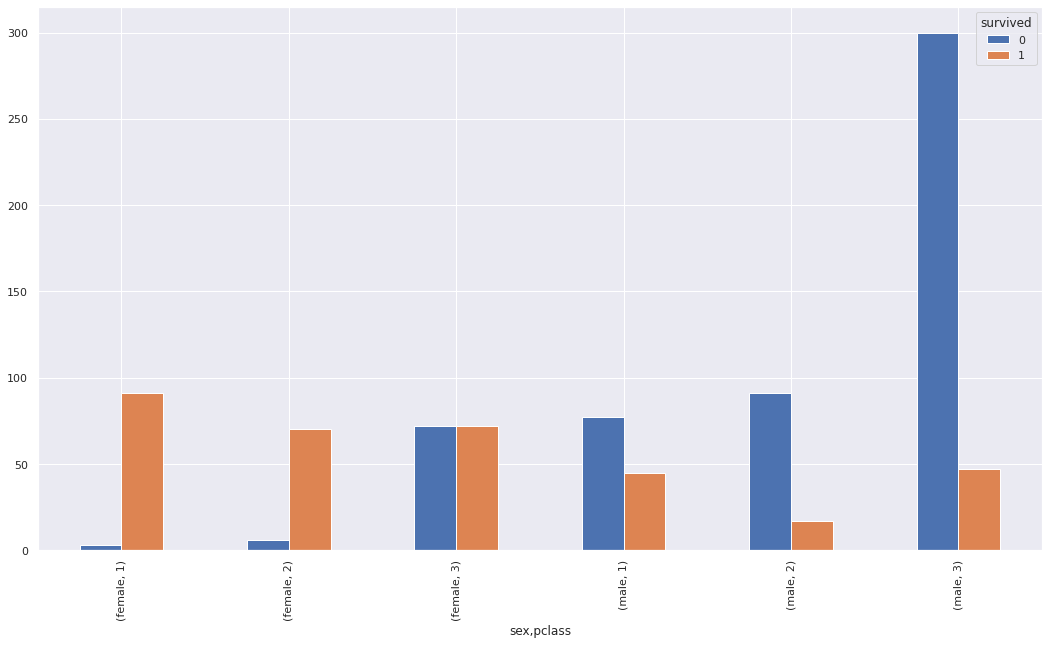

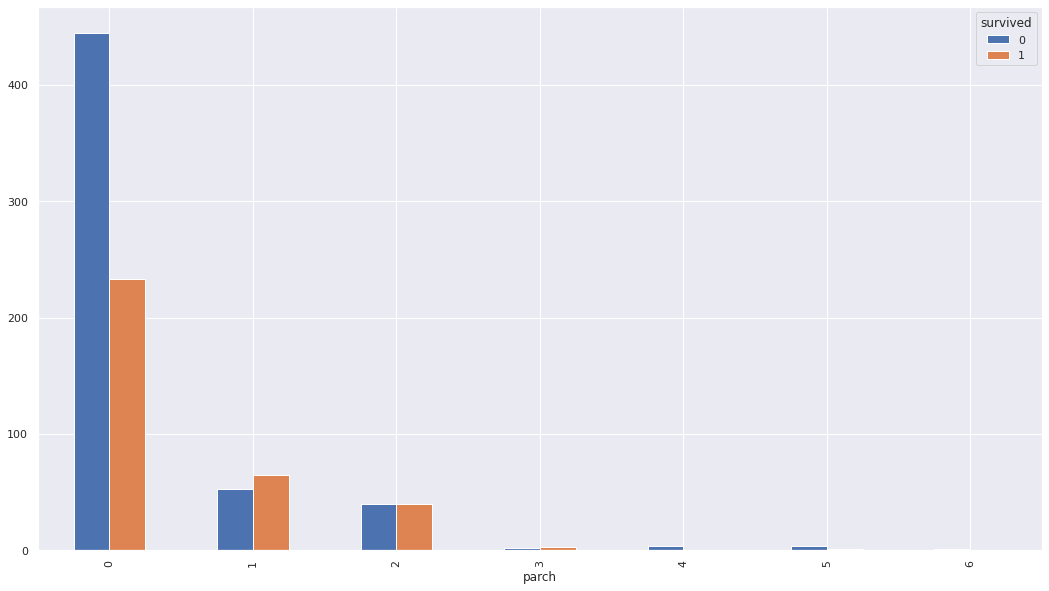

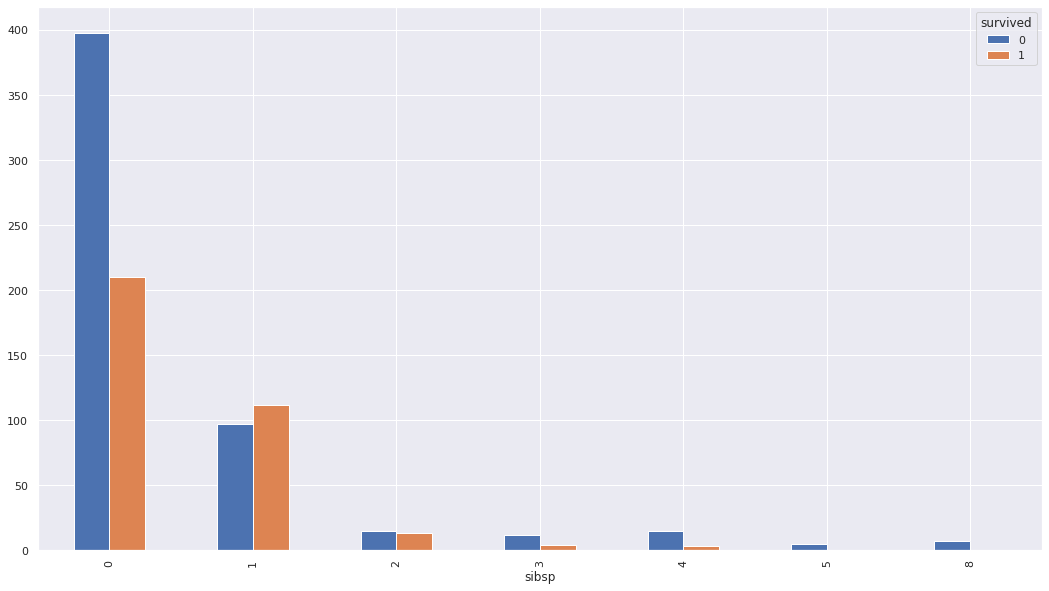

In [353]:
print(pd.crosstab([train_df['sex'],train_df['pclass']],train_df['survived'],margins=False).plot(kind='bar'))
print('\n')
print(pd.crosstab(train_df['parch'],train_df['survived']).plot(kind='bar'))
print('\n')
print(pd.crosstab(train_df['sibsp'],train_df['survived']).plot(kind='bar'))
print('\n')

In [431]:
# data[data['embarked']=='S'][['fare']].mean()
# data[data['pclass']==3][['fare']].mean()
# data[data['sex']=='male'][['fare']].mean()
# data[data['age']>=60][['fare']].mean()
# data[data['pclass']==3][['fare']].mean()
fare_to_replace = data[(data['pclass']==3)&(data['sex']=='male')&(data['embarked']=='S')&(data['age']>=60)][['fare']].dropna().mean()
fare_to_replace

fare    7.00625
dtype: float64

----------
AxesSubplot(0.125,0.125;0.775x0.755)


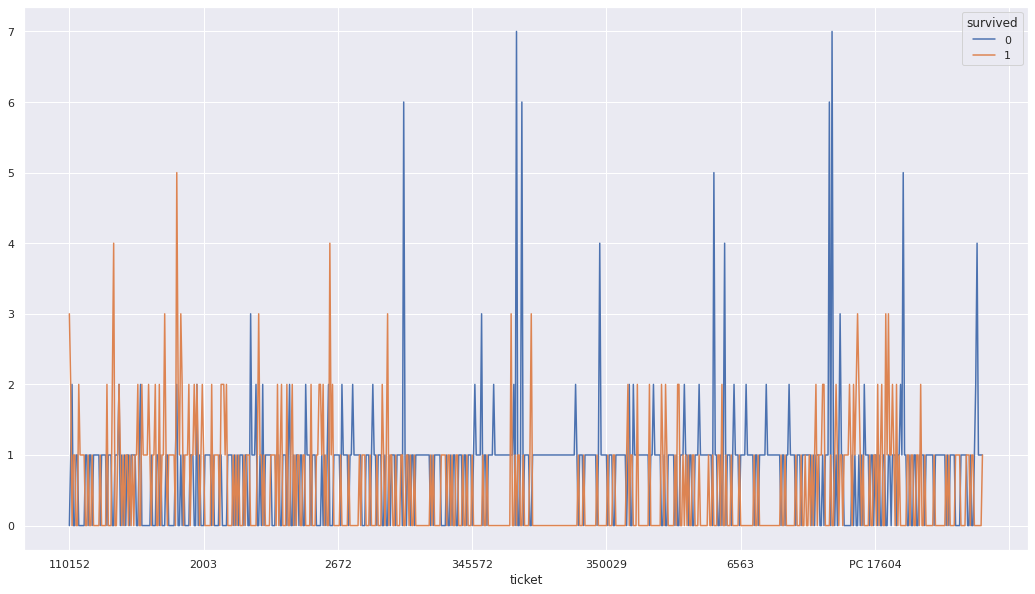

In [432]:
# print(train_df.groupby('ticket')['survived'].count())
print('-'*10)
print(pd.crosstab(train_df['ticket'],train_df['survived']).plot(kind='line'))

In [433]:
#impute age for train/test data from entire data
# data['age']=data.age.fillna(data.title.map(age_dict))
train_df['age'] = train_df.age.fillna(train_df.title.map(age_dict))
test_df['age']=test_df.age.fillna(test_df.title.map(age_dict))

In [434]:
X_test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
title       0
dtype: int64

In [440]:
#prepare the TRAIN data  removing null, cat->num
train_df_1=train_df.copy()
# train_df_1['age'].fillna(data['age'].median(),inplace=True)
#fill null age to mean
train_df_1.drop(['passengerid','cabin','ticket','name','title'],axis=1,inplace=True)  #drop cabin because lot of null values 
#convert categorical var into numerical var
pclass_dummy = pd.get_dummies(train_df_1['pclass'],prefix='class')
sex_dummy=pd.get_dummies(train_df_1['sex'])
sibsp_dummy=pd.get_dummies(train_df_1['sibsp'],prefix='sibsp')
embarked_dummy=pd.get_dummies(train_df_1['embarked'])
parch_dummy=pd.get_dummies(train_df_1['parch'],prefix='parch')

In [441]:
#prepare the TEST  removing null, cat->num
test_df_1 = test_df.copy()
# test_df_1['age'].fillna(data['age'].median(),inplace=True)    #fill null age to mean
test_df_1.drop(['passengerid','cabin','ticket','name','title'],axis=1,inplace=True)  #drop cabin because lot of null values 
#convert categorical var into numerical var
test_pclass_dummy = pd.get_dummies(test_df_1['pclass'],prefix='class')
test_sex_dummy=pd.get_dummies(test_df_1['sex'])
test_sibsp_dummy=pd.get_dummies(test_df_1['sibsp'],prefix='sibsp')
test_embarked_dummy=pd.get_dummies(test_df_1['embarked'])
test_parch_dummy=pd.get_dummies(test_df_1['parch'],prefix='parch')

In [442]:
train_df_1.drop(['pclass','sex','sibsp','parch','embarked'],axis=1,inplace=True)
train_df_1 = train_df_1.join(sex_dummy)
train_df_1 = train_df_1.join(pclass_dummy)
train_df_1 = train_df_1.join(sibsp_dummy)
train_df_1 = train_df_1.join(parch_dummy)
train_df_1 = train_df_1.join(embarked_dummy)
train_df_1.head()

,survived,age,fare,female,male,class_1,class_2,class_3,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,C,Q,S
0,0,22.0,7.2500,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [443]:
test_df_1.drop(['pclass','sex','sibsp','parch','embarked'],axis=1,inplace=True)
test_df_1 = test_df_1.join(test_sex_dummy)
test_df_1 = test_df_1.join(test_pclass_dummy)
test_df_1 = test_df_1.join(test_sibsp_dummy)
test_df_1 = test_df_1.join(test_parch_dummy)
test_df_1 = test_df_1.join(test_embarked_dummy)
test_df_1.head()

,age,fare,female,male,class_1,class_2,class_3,sibsp_0,sibsp_1,sibsp_2,...,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,parch_9,C,Q,S
0,34.5,7.8292,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [444]:
#select X_train from "data"
X_train = train_df_1.drop(['survived'],axis=1)  
y_train = train_df_1['survived']

In [445]:
#i learned i can't drop fare so i am checking its name, class
test_df_1.iloc[152]

age        60.5
fare        NaN
female      0.0
male        1.0
class_1     0.0
class_2     0.0
class_3     1.0
sibsp_0     1.0
sibsp_1     0.0
sibsp_2     0.0
sibsp_3     0.0
sibsp_4     0.0
sibsp_5     0.0
sibsp_8     0.0
parch_0     1.0
parch_1     0.0
parch_2     0.0
parch_3     0.0
parch_4     0.0
parch_5     0.0
parch_6     0.0
parch_9     0.0
C           0.0
Q           0.0
S           1.0
Name: 152, dtype: float64

In [446]:
test_df_1['fare'].fillna(fare_to_replace.at['fare'],inplace=True)

In [447]:
X_test = test_df_1
X_test.drop('parch_9',axis=1,inplace=True)

In [448]:
#data transform
# scaler = StandardScaler()
# rescaled_Xtrain = scaler.fit_transform(X_train)
# rescaled_Xtest = scaler.transform(X_test)
#define the cv procedure
# kfold=KFold(n_splits=10,random_state=1)
#define the baseline model
model= RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
#evaluate the model
# result = cross_val_score(model,rescaled_Xtrain,y_train,cv=kfold,scoring='accuracy')
#report the mean performance
# print(f'accuracy: {result.mean()*100.0}')


KNeighborsClassifier()

In [449]:
y_pred = model.predict(X_test)
model.score(X_train,y_train)

0.8114478114478114

In [450]:
submission= pd.DataFrame({'PassengerId':test_df['passengerid'],'survived':y_pred})
submission.to_csv('titanic_submission_1',header=True,index=False)

In [ ]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "my.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')